### Championship RL 2023

Aims: Create the WPC for each team and create the PyExp for each team as well as look at the relationship between the two.

In [30]:
!pip install openpyxl

In [31]:
# Include necessary packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
# Create DATAFRAME for the data.
data_dir = "./data/"
CRL = pd.DataFrame()

for file in os.listdir(data_dir):
    CRL = CRL._append(pd.read_excel(f"{data_dir}{file}"))
    x = file.split("_")[1]
    season = x.replace(".xlsx", "")
    CRL["season"] = season

CRL = CRL.reset_index(drop=True)
CRL = CRL.replace("-", 0)

# Create Totals for Values we care about
CRL["TotalGames"] = CRL["HomeG"] + CRL["AwayG"]
CRL["TotalWins"] = CRL["HomeW"] + CRL["AwayW"]
CRL["TotalLosses"] = CRL["HomeL"] + CRL["AwayL"]
CRL["TotalPoints"] = CRL["HomeP"] + CRL["AwayP"]
CRL["TotalPointsA"] = CRL["VisitorP"] + CRL["HomeP.1"]
CRL["TotalDraws"] = CRL["HomeD"] + CRL["AwayD"]

,Team,HomeG,HomeW,HomeL,HomeD,HomeP,VisitorP,AwayG,AwayW,AwayL,AwayD,AwayP,HomeP.1,season,TotalGames,TotalWins,TotalLosses,TotalPoints,TotalPointsA,TotalDraws
0,Featherstone,14,13,1,0,634,162,13,12,1,0,445,133,2022,27,25,2,1079,295,0
1,Toulouse,13,12,1,0,560,141,14,7,7,0,272,244,2022,27,19,8,832,385,0
2,Bradford,14,9,4,1,392,241,13,7,6,0,285,331,2022,27,16,10,677,572,1
3,Sheffield,13,9,4,0,382,211,14,7,7,0,398,349,2022,27,16,11,780,560,0
4,London,14,9,5,0,344,241,13,7,6,0,256,311,2022,27,16,11,600,552,0
5,York,13,8,5,0,264,249,14,7,7,0,293,308,2022,27,15,12,557,557,0
6,Batley,13,8,5,0,257,260,14,7,7,0,249,259,2022,27,15,12,506,519,0
7,Halifax,14,10,4,0,403,236,13,4,8,1,287,336,2022,27,14,12,690,572,1
8,Widnes,14,8,6,0,328,287,13,5,8,0,291,365,2022,27,13,14,619,652,0
9,Swinton,13,5,8,0,182,370,14,4,10,0,244,369,2022,27,9,18,426,739,0


In [33]:
# Now we can determine the WPC (Win Percentage for each team) We will do an overall WPC and a WPC for Home and Away

CRL["OverallWPC"] = CRL["TotalWins"] / CRL["TotalGames"]
CRL["HomeWPC"] = CRL["HomeW"] / CRL["HomeG"]
CRL["AwayWPC"] = CRL["AwayW"] / CRL["AwayG"]

,Team,HomeG,HomeW,HomeL,HomeD,HomeP,VisitorP,AwayG,AwayW,AwayL,...,season,TotalGames,TotalWins,TotalLosses,TotalPoints,TotalPointsA,TotalDraws,OverallWPC,HomeWPC,AwayWPC
0,Featherstone,14,13,1,0,634,162,13,12,1,...,2022,27,25,2,1079,295,0,0.925926,0.928571,0.923077
1,Toulouse,13,12,1,0,560,141,14,7,7,...,2022,27,19,8,832,385,0,0.703704,0.923077,0.500000
2,Bradford,14,9,4,1,392,241,13,7,6,...,2022,27,16,10,677,572,1,0.592593,0.642857,0.538462
3,Sheffield,13,9,4,0,382,211,14,7,7,...,2022,27,16,11,780,560,0,0.592593,0.692308,0.500000
4,London,14,9,5,0,344,241,13,7,6,...,2022,27,16,11,600,552,0,0.592593,0.642857,0.538462
5,York,13,8,5,0,264,249,14,7,7,...,2022,27,15,12,557,557,0,0.555556,0.615385,0.500000
6,Batley,13,8,5,0,257,260,14,7,7,...,2022,27,15,12,506,519,0,0.555556,0.615385,0.500000
7,Halifax,14,10,4,0,403,236,13,4,8,...,2022,27,14,12,690,572,1,0.518519,0.714286,0.307692
8,Widnes,14,8,6,0,328,287,13,5,8,...,2022,27,13,14,619,652,0,0.481481,0.571429,0.384615
9,Swinton,13,5,8,0,182,370,14,4,10,...,2022,27,9,18,426,739,0,0.333333,0.384615,0.285714


In [34]:
# Now lets generate the PyExp for each team
CRL['PyExp'] = CRL['TotalPoints']**2/(CRL['TotalPoints']**2 + CRL['TotalPointsA']**2)


,Team,HomeG,HomeW,HomeL,HomeD,HomeP,VisitorP,AwayG,AwayW,AwayL,...,TotalGames,TotalWins,TotalLosses,TotalPoints,TotalPointsA,TotalDraws,OverallWPC,HomeWPC,AwayWPC,PyExp
0,Featherstone,14,13,1,0,634,162,13,12,1,...,27,25,2,1079,295,0,0.925926,0.928571,0.923077,0.930450
1,Toulouse,13,12,1,0,560,141,14,7,7,...,27,19,8,832,385,0,0.703704,0.923077,0.500000,0.823636
2,Bradford,14,9,4,1,392,241,13,7,6,...,27,16,10,677,572,1,0.592593,0.642857,0.538462,0.583477
3,Sheffield,13,9,4,0,382,211,14,7,7,...,27,16,11,780,560,0,0.592593,0.692308,0.500000,0.659870
4,London,14,9,5,0,344,241,13,7,6,...,27,16,11,600,552,0,0.592593,0.642857,0.538462,0.541594
5,York,13,8,5,0,264,249,14,7,7,...,27,15,12,557,557,0,0.555556,0.615385,0.500000,0.500000
6,Batley,13,8,5,0,257,260,14,7,7,...,27,15,12,506,519,0,0.555556,0.615385,0.500000,0.487319
7,Halifax,14,10,4,0,403,236,13,4,8,...,27,14,12,690,572,1,0.518519,0.714286,0.307692,0.592692
8,Widnes,14,8,6,0,328,287,13,5,8,...,27,13,14,619,652,0,0.481481,0.571429,0.384615,0.474054
9,Swinton,13,5,8,0,182,370,14,4,10,...,27,9,18,426,739,0,0.333333,0.384615,0.285714,0.249418


In [56]:
# Create subset DF of what we want

CRL23 = CRL[['Team', 'TotalGames', 'PyExp', 'OverallWPC', 'HomeWPC', 'AwayWPC', 'TotalPoints', 'TotalPointsA', "TotalWins", "season"]]


In [57]:
CRL23 = CRL23.groupby(["Team"])[
    [
        "PyExp",
        "OverallWPC",
        "HomeWPC",
        "AwayWPC",
        "TotalPoints",
        "TotalPointsA",
        "TotalWins",
    ]
].agg("mean")

CRL23["OverallWPC"] = CRL23["OverallWPC"] * 100


CRL23 = CRL23.sort_values(by=["PyExp"], ascending=False)

def calc_posx(x):
    if x >= 0.7:
        return 'Top 4'
    elif x >= 0.4 and x < 0.7:
        return 'Mid Table'
    else:
        return "Bottom Table"

CRL23['Table_Posx'] = CRL23['PyExp'].apply(calc_posx)

CRL23

,PyExp,OverallWPC,HomeWPC,AwayWPC,TotalPoints,TotalPointsA,TotalWins,Table_Posx
Team,,,,,,,,
Leigh,0.975262,96.296296,1.000000,0.928571,1306.0,208.0,26.0,Top 4
Featherstone,0.883660,88.888889,0.892857,0.884615,1069.5,381.5,24.0,Top 4
Toulouse,0.823636,70.370370,0.923077,0.500000,832.0,385.0,19.0,Top 4
Halifax,0.687318,62.962963,0.741758,0.510989,763.5,507.0,17.0,Mid Table
Sheffield,0.594984,51.851852,0.576923,0.464286,740.5,610.0,14.0,Mid Table
Batley,0.564701,59.259259,0.593407,0.596154,622.0,535.0,16.0,Mid Table
York City,0.563373,66.666667,0.538462,0.785714,677.0,596.0,18.0,Mid Table
York,0.500000,55.555556,0.615385,0.500000,557.0,557.0,15.0,Mid Table
Bradford,0.478612,50.000000,0.464286,0.538462,600.0,624.5,13.5,Mid Table


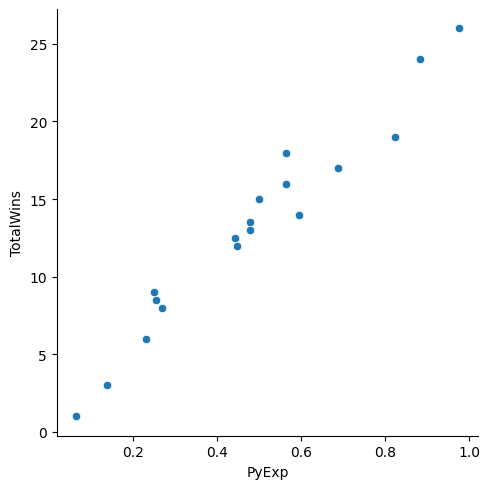

In [55]:
sns.relplot(x='PyExp', y='TotalWins', data=CRL23)

In [ ]:
pyth_lm = smf.ols(formula= 'OverallWPC ~ PyExp', data=CRL23).fit()
pyth_lm.summary()

/usr/local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             OverallWPC   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     327.2
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           4.48e-12
Time:                        14:30:31   Log-Likelihood:                -54.923
No. Observations:                  18   AIC:                             113.8
Df Residuals:                      16   BIC:                             115.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5990      2.790      1.290      0.215      -2.316       9.514
PyExp         93.4556      5.167     18.089      0.000      82.503     104.408
==============================================================================
Omnibus:                        0.063   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.217
Skew:                          -0.115   Prob(JB):                        0.897
Kurtosis:                       2.515   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""